# DATA ANALYSIS -1 

<p style="background-color:#102C42 ; color: white ;border-radius: 7px ; font-size:125%" >Create a Linear Regression Model using Python to predict home prices using boston Houing dataset. the Boston Housing Dataset consists infomration about various houses in boston thorugh different parameters. There are 506 damples and 14 features variables in the dataset. The objective is to redict the value of prices of the house using the given features. </p>

In [1]:
# Disable warnings in the dataset to maintain clean output cells

import warnings
warnings.filterwarnings('ignore')

# <p style="background-color: #102C42;  color:white; font-size:140%;  text-align:center; border-radius:15px 50px;">Step 1: Import all the required Python Libraries
</p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
%matplotlib inline

# <p style="background-color: #102C42; color:white ; border-radius:15px 50px ; text-align:center ; font-size:140%"   > Step 2. Data Acqusition </p>

In [3]:
df = pd.read_csv(r"D:\SEM 6 PRACTICAL\datasets\HousingData.csv")

#display the first 10 records
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


# <p style="background-color: #102C42 ;  font-size:140% ; color:white ; text-align:center ; border-radius:15px 50px"> Step 3. Exploratory Data Analysis </p>

<Axes: ylabel='Count'>

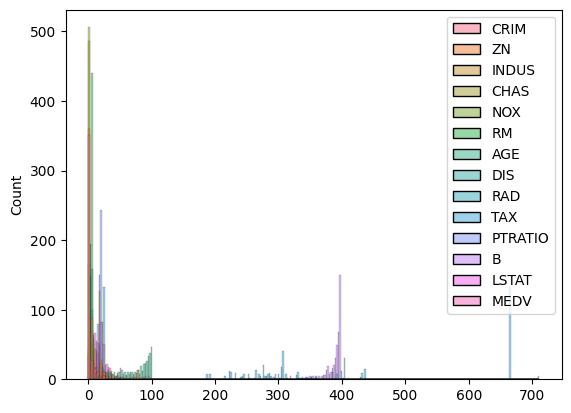

In [4]:
sns.histplot(df)

In [5]:
print("The dimension of the dataset is:", df.shape)

The dimension of the dataset is: (506, 14)


In [6]:
print("Statistical Analysis of the Dataset: \n\n" , df.describe())

Statistical Analysis of the Dataset: 

              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  3

In [7]:
print("Summary of the Dataset:")
df.info()

Summary of the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [9]:
df.isnull().sum().sum()

120

In [10]:
df.duplicated().sum()

0

<Axes: >

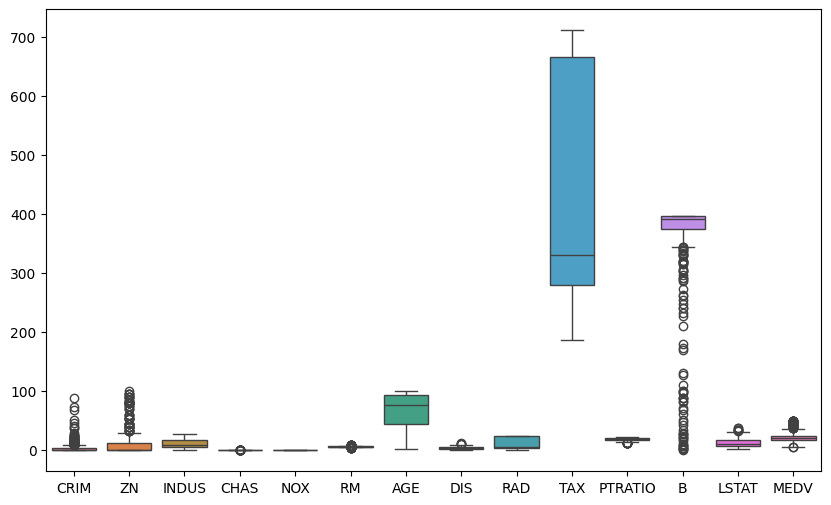

In [11]:
plt.figure(figsize=(10, 6))
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'MEDV']
sns.boxplot(df[columns])

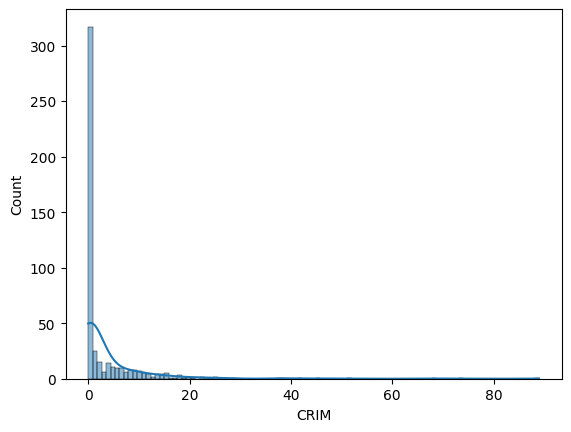

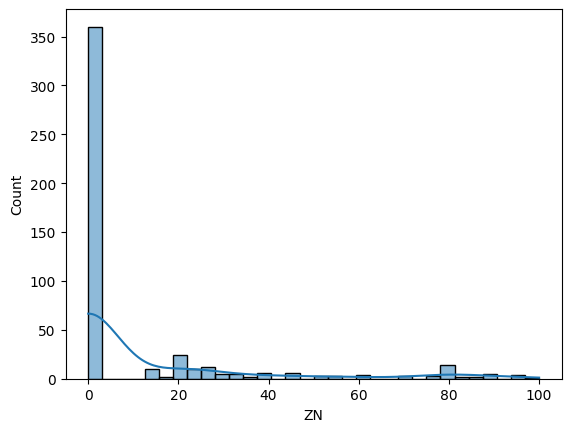

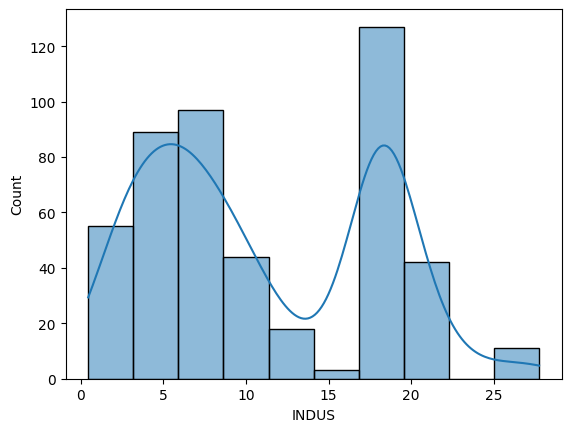

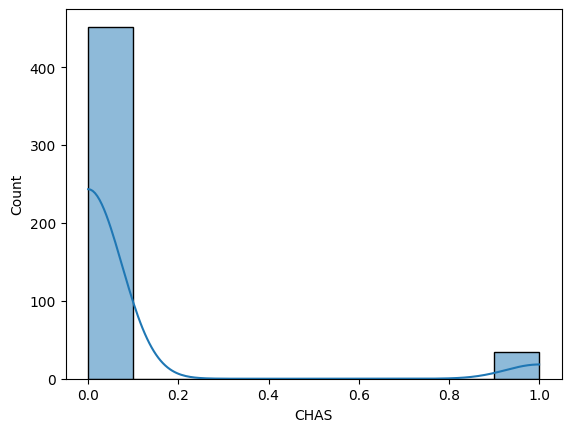

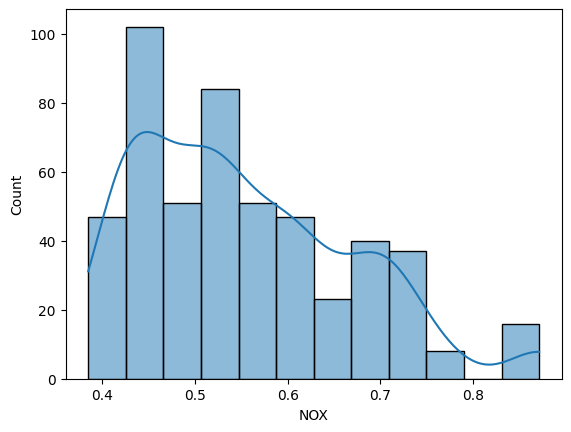

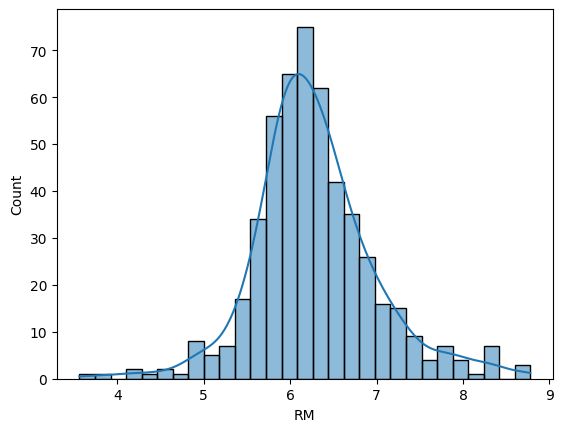

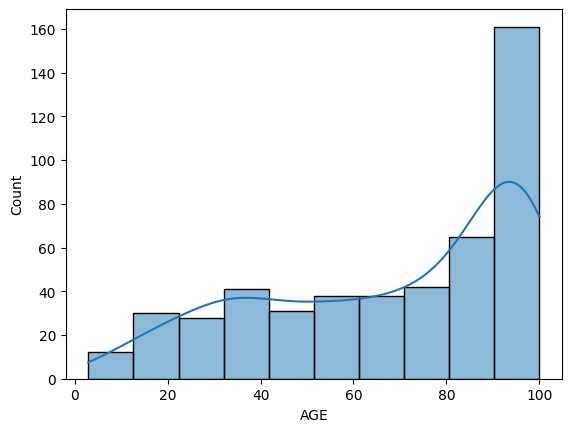

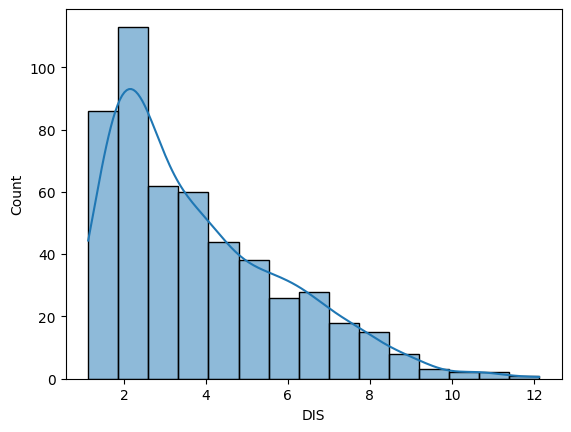

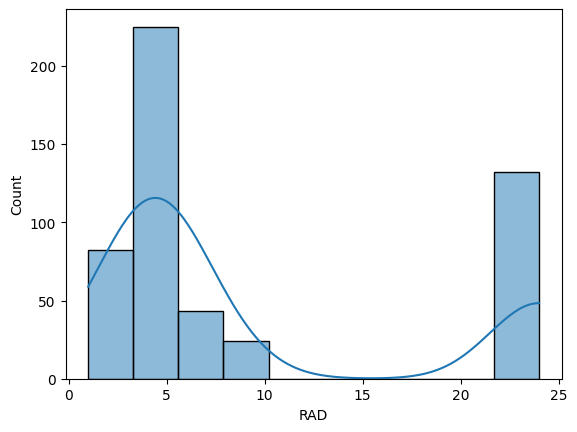

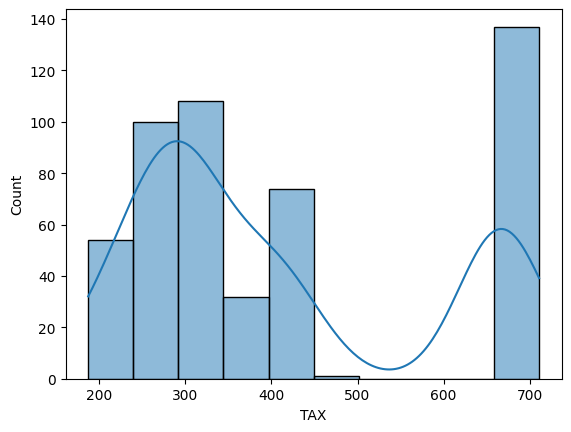

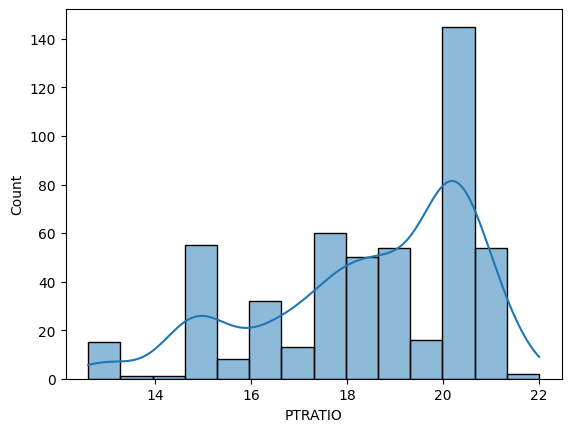

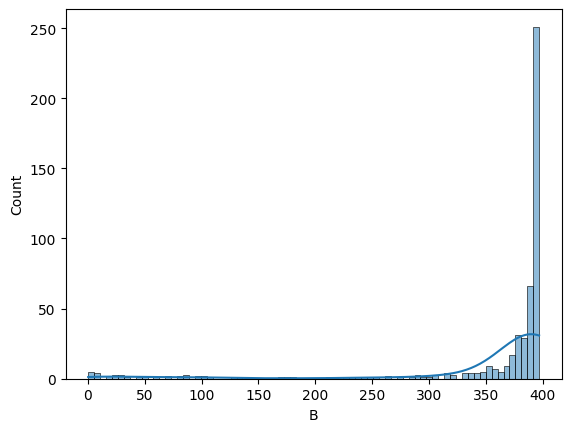

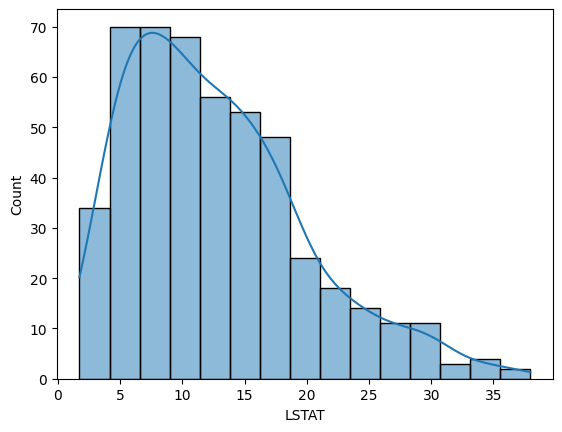

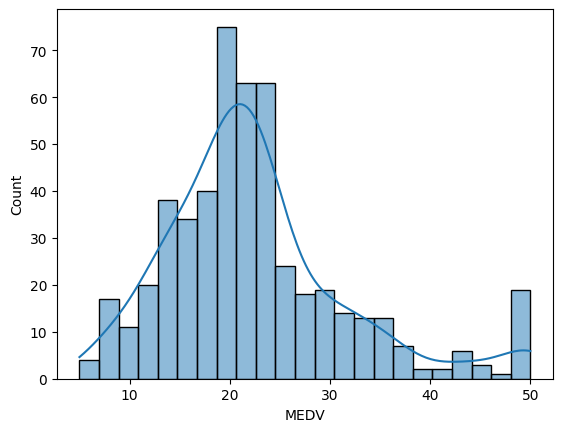

In [12]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

for column in columns:
    sns.histplot(data=df, x=df[column], kde=True , palette='dark')
    plt.xlabel(column)  # Use the column name as the x-axis label
    plt.show()

<div style="background-color:#102C42; border-radius:20px; color:white">
    <h1 style="text-align:center">Inference</h1>
    <p>1. There are total 506 datapoints and 14 Features</p>
    <p>2. The Target Feature is MEDV</p>
    <p>3. All the features are of numerical type</p>
    <p>4. There are 120 missing values</p>
    <p>5. There are no duplicate values</p>
    <p>6. Outliers are present in various columns</p>
</div>


# <p style="background-color:#102C42; text-align:center; font-size:140%; border-radius:50px 15px; color:white">Step 4 Data Preparation</p>


In [13]:
#HANDLING MISSING VALUES
def fill_missing_with_mean(data, columns):
    """
    Fill missing values in specified columns of a DataFrame with the mean of each column.

    Parameters:
    data (DataFrame): The input DataFrame containing the data.
    columns (list): A list of column names in the DataFrame for which missing values need to be filled.

    Returns:
    DataFrame: A copy of the input DataFrame with missing values filled in the specified columns.
    """
    for column in columns:
        mean = data[column].mean()
        data[column].fillna(mean, inplace=True)
    return data

print(fill_missing_with_mean.__doc__)


    Fill missing values in specified columns of a DataFrame with the mean of each column.

    Parameters:
    data (DataFrame): The input DataFrame containing the data.
    columns (list): A list of column names in the DataFrame for which missing values need to be filled.

    Returns:
    DataFrame: A copy of the input DataFrame with missing values filled in the specified columns.
    


In [14]:
def handle_outliers_iqr(data, columns):
    """
    Handle outliers in specified columns of a DataFrame using the Interquartile Range (IQR) method.

    Parameters:
    data (DataFrame): The input DataFrame containing the data.
    columns (list): A list of column names in the DataFrame for which outliers need to be handled.

    Returns:
    DataFrame: A copy of the input DataFrame with outliers handled in the specified columns.
    """
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return data
print(handle_outliers_iqr.__doc__)



    Handle outliers in specified columns of a DataFrame using the Interquartile Range (IQR) method.

    Parameters:
    data (DataFrame): The input DataFrame containing the data.
    columns (list): A list of column names in the DataFrame for which outliers need to be handled.

    Returns:
    DataFrame: A copy of the input DataFrame with outliers handled in the specified columns.
    


In [15]:
df = handle_outliers_iqr(df, columns)


<Axes: >

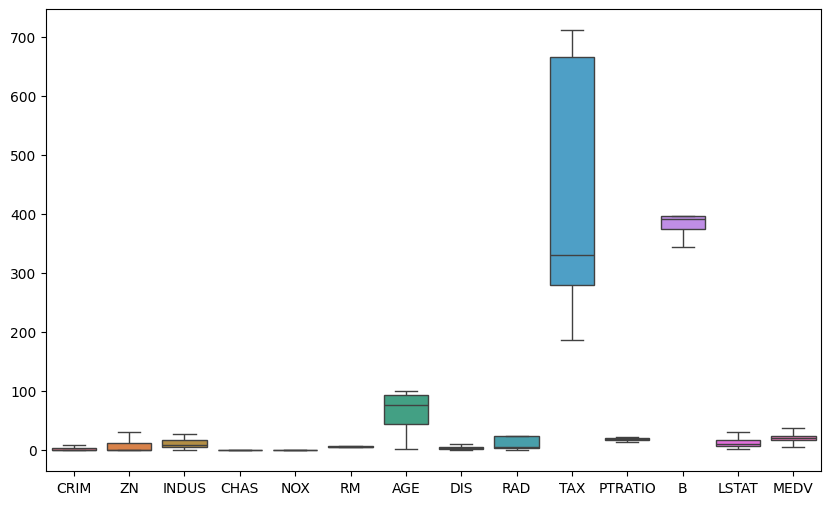

In [16]:
plt.figure(figsize=(10, 6))
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'MEDV']
sns.boxplot(df[columns])

In [17]:
df = fill_missing_with_mean(df, columns)

In [18]:
df.isnull().sum().sum()

0

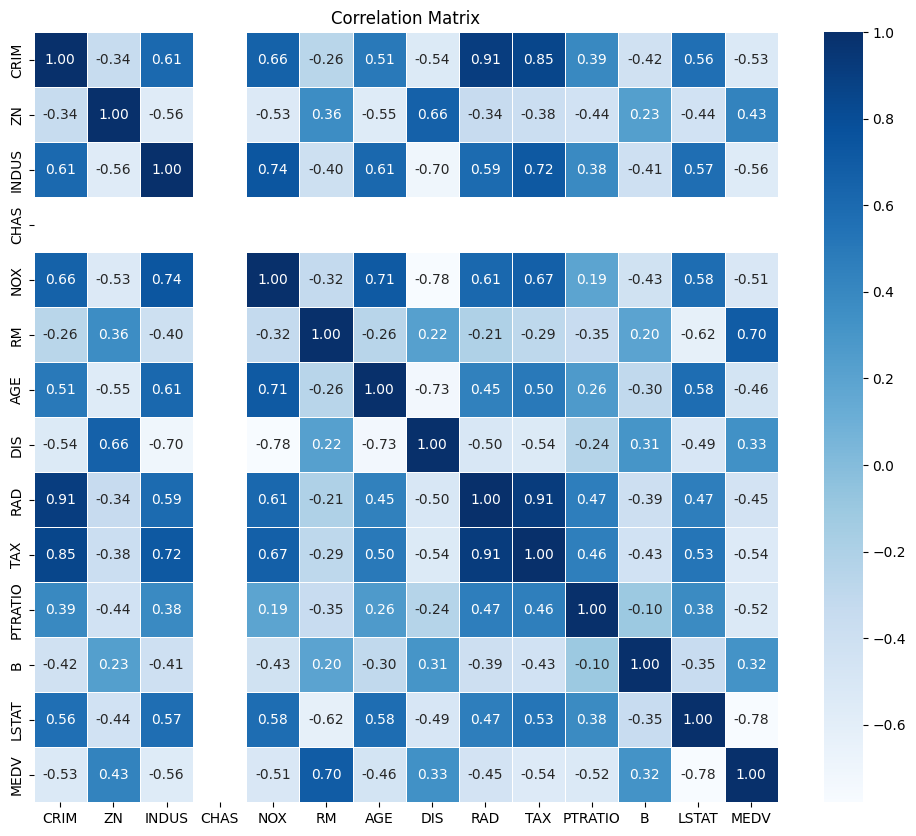

In [19]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [20]:
df.CHAS

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

In [21]:
df = df.drop('CHAS', axis =1)

In [22]:
def standardize_boston_dataset():
    """
    Standardizes the features in the Boston House Pricing dataset.

    Returns:
    X_scaled (): The standardized feature matrix.
    y (): The target variable array.
    """
    scaler = StandardScaler()
    X= df.drop("MEDV",axis=1)
    y=df["MEDV"]
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

print(standardize_boston_dataset.__doc__)


    Standardizes the features in the Boston House Pricing dataset.

    Returns:
    X_scaled (): The standardized feature matrix.
    y (): The target variable array.
    


In [23]:
X_scaled,y = standardize_boston_dataset()
print(X_scaled)

[[-0.68322344  0.96622588 -1.31101039 ... -1.4771812   0.78698807
  -1.11926114]
 [-0.67654723 -0.5822136  -0.5997709  ... -0.30994139  0.78698807
  -0.51369719]
 [-0.67655359 -0.5822136  -0.5997709  ... -0.30994139  0.57318348
  -1.25755098]
 ...
 [-0.66590791 -0.5822136   0.1264106  ...  1.18412558  0.78698807
  -1.02318609]
 [-0.65037673 -0.5822136   0.1264106  ...  1.18412558  0.60575322
  -0.90090875]
 [-0.67015409 -0.5822136   0.1264106  ...  1.18412558  0.78698807
  -0.6971132 ]]


In [24]:
new_df = pd.DataFrame(X_scaled , columns=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT'])

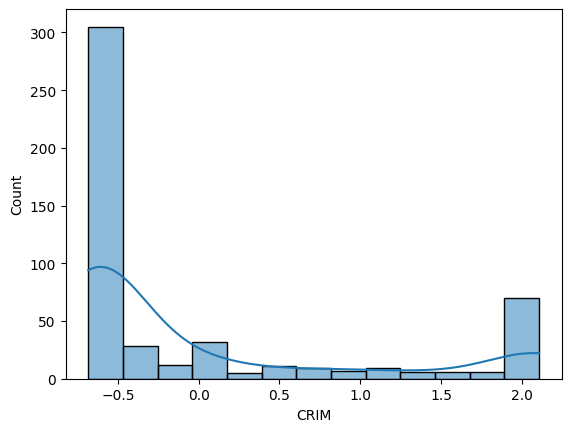

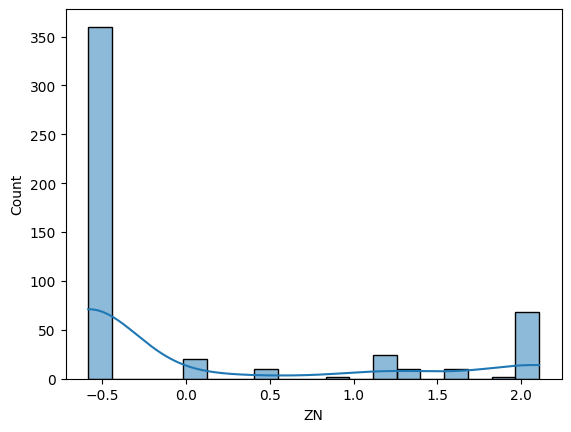

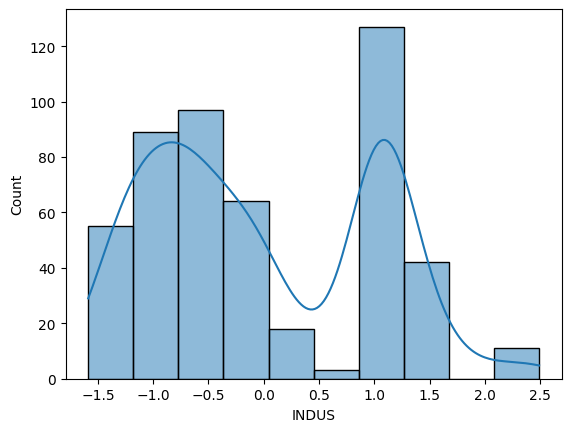

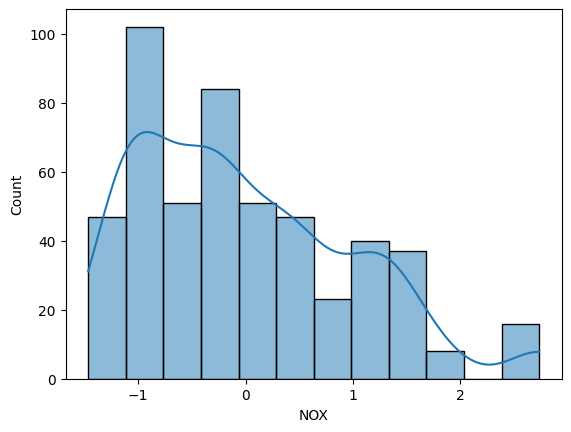

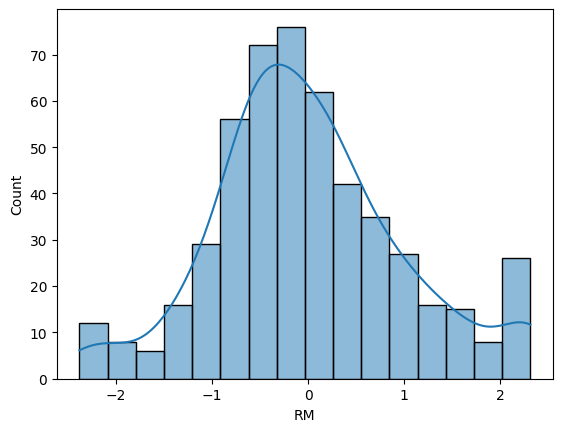

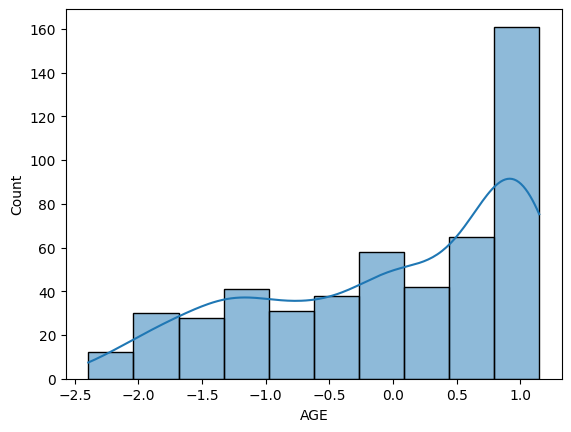

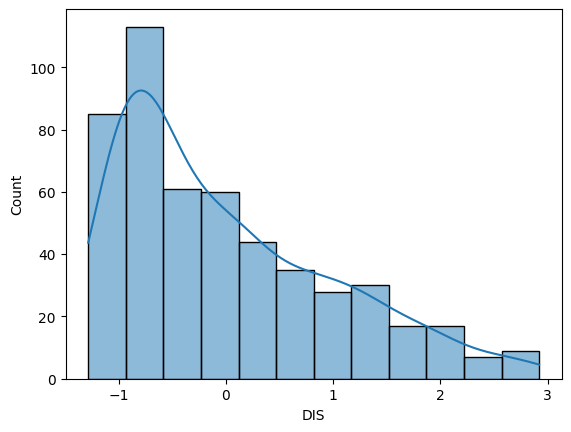

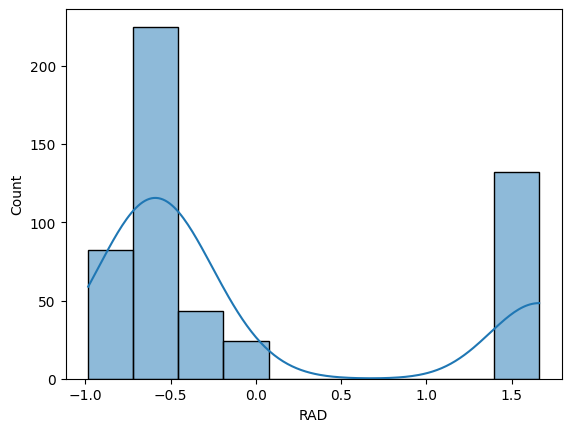

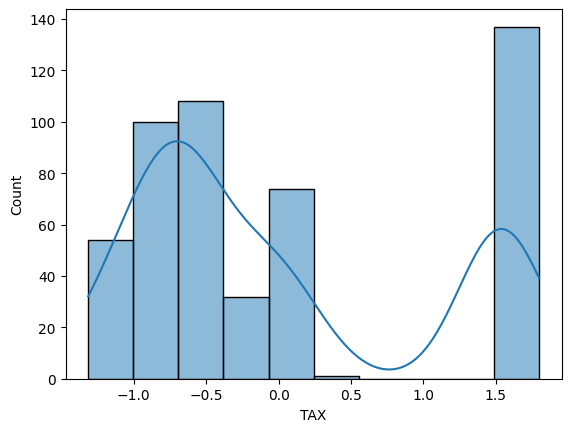

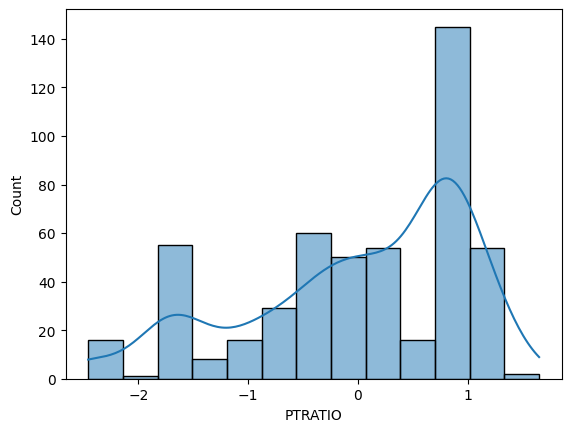

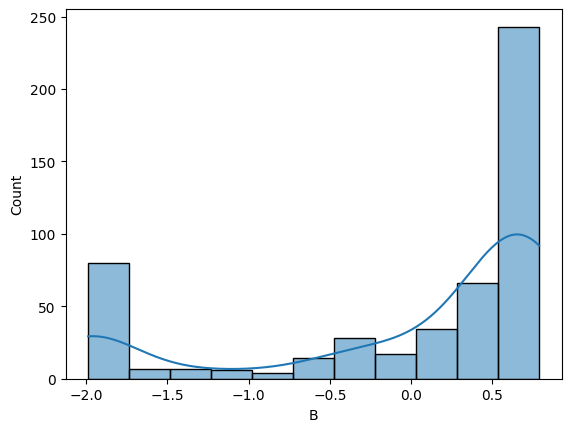

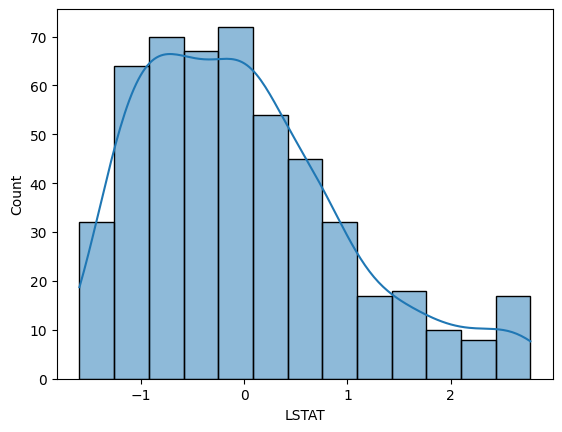

In [25]:
columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for column in columns:
    sns.histplot(data=new_df, x=new_df[column], kde=True , palette='dark')
    plt.xlabel(column)  # Use the column name as the x-axis label
    plt.show()

# <p style="background-color:#102C42; text-align:center; font-size:140%; border-radius:50px 15px; color:white">Step 5 Model Building</p>


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2 , random_state= 42)

In [27]:
model = LinearRegression()
model

LinearRegression()

In [28]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# <p style="background-color:#102C42; text-align:center; font-size:140%; border-radius:50px 15px; color:white">Step 6 Model Evaluation</p>


In [29]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 12.725176967063685


In [30]:
r2 = r2_score(y_test, y_pred)
print("R2 ", r2)

R2  0.7399041396656765


In [31]:
actual_predicted_df = pd.DataFrame({
    'Actual Values': y_test.values,
    'Predicted Values': y_pred
})

actual_predicted_df.head()

,Actual Values,Predicted Values
0,23.6,28.077366
1,32.4,32.174141
2,13.6,14.568744
3,22.8,24.976549
4,16.1,17.328518


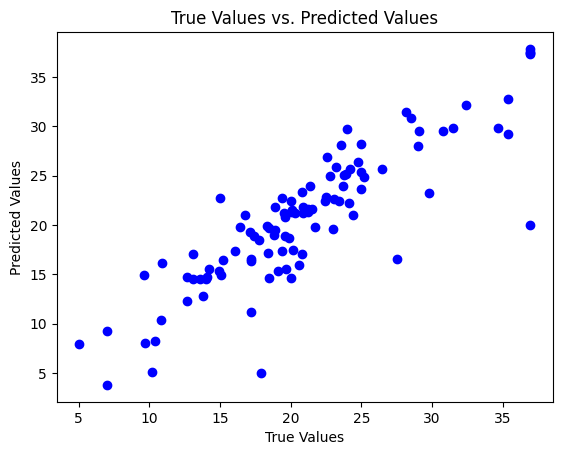

In [42]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')
plt.show()

In [43]:
# Retrieve the coefficients (m) and the intercept (c)
m = model.coef_
c = model.intercept_

# Print the values of m and c
print("Coefficients (m):", m)
print("Intercept (c):", c)

Coefficients (m): [-1.71840401  0.44536575 -0.37098722 -1.2703337   2.34862556 -0.55046941
 -2.43943652  2.10612159 -1.35718503 -1.68143159  0.3417837  -2.85615714]
Intercept (c): 21.83285835491167
